# <font color = 'black'> Analysis of Climate Change Community </font>
<font color = acacaa> <b> "Uncovering the Climate Change Conversation on Twitter: Analyzing Hashtags, Communities, and Sentiments."</b> </font>
***


## <font color = 'black'> Team Member </font>
<font color = 'black'> <li> Mohammad Azizul Kawser  
&emsp; azizul.kawser@student.oulu.fi </li><li> Saara Laasonen  
&emsp; Saara.Laasonen@student.oulu.fi </li><li> Pranav Bahulekar  
&emsp; Pranav.Bahulekar@student.oulu.fi </li></font>
***



## <font color = 'black'> Project description </font>
<font color = 'black'> <li> The problem statement for this project is to analyze the social media activity related to climate change by identifying the most popular hashtags, the regional locations and languages associated with them, and the sentiment expressed in the tweets.</li> <li>Additionally, the aim is to build a social graph of hashtags based on their co-occurrence in tweets, and to analyze its properties such as the number of nodes, edges, degree centrality, clustering coefficient, and size of the largest component.</li><li>The project also aims to identify communities within the social graph and analyze their characteristics. Furthermore, the project seeks to identify potential bots in the most popular hashtags, and quantify the amount of support each hashtag receives based on retweets and replies. The results will be interpreted in the context of the existing literature on climate change.</li>
</font>

***


## <font color = 'black'> Task List </font>
<font color = 'black'> <ol> <li>Data Collection using Twitter (Scrapping)</li><li>Data Analysis: Hashtag Popularity</li><li>Data Analysis: Tweet Location</li><li>Data Analysis: Tweet Language</li><li>Sentiment Analysis using VADER Tool</li><li>Social Graph Generation</li><li>Degree Distribution and Local Clustering Coefficient Distribution</li><li>Community Detection using Label Propagation Algorithm</li><li>Bot Detection using Botometer</li><li>Quantification of Support for Hashtags</li> </ol></font>

***


## <font color = 'black'> Methodology </font>
<font color = 'black'> Structural-Functional approach was used in this project. <li>This approach focuses on the patterns of connections between nodes and how these patterns influence the functioning of the network as a whole.</li><li>For example, this project includes tasks such as identifying important nodes in the network, analyzing the network's degree centrality and clustering coefficient, and examining the distribution of connections between nodes. </li><li>By this approach we are identifying key nodes and analyzing the overall network structure and dynamics.</li></font>

***


### <font color = 'sky blue'> Task 1 - Data Collection using Twitter (Data Scraping) </font>

#### <font color = 'black'>1.1 Following popular climate change related hashtags were selected for Tweet data collection 
#globalwarming ,#climatechange ,#agw, #climateand, #climaterealists, #climatestrikeonline, #ClimateAction, #ClimateCrisis, #ActOnClimate, #ClimateEmergency, #ClimateJustice, #CleanEnergy, #RenewableEnergy </font>

#### <font color='black'> Below line of code was uesed to find the tweet id of the above hashtags related tweets</font>

<font color='red'> @pranav edit this code accordingly </font>

let i = 1;
let dict = {};
let like_regex = /\b(\d+) Like|Likes\b/;
let retweet_regex = /\b(\d+) Retweet|Retweets\b/;
let reply_regex = /\b(\d+) Repl(ies|y)\. Reply\b/;
let time_regex =  /\btime datetime=\"(.*?)\">\b/;
let status_regex = /\b\/status\/(\d+)\b/;
           
function loop() {    
    console.log('hi azizul',azizul)  
    setTimeout(function() {
        window.scrollBy(0,1000);
      let element = document.getElementsByClassName("css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-kzbkwu");
        for(let index=0; index<element.length; index++) {
            try {
              let reply = element[index].innerHTML.match(reply_regex);
              let like = element[index].innerHTML.match(like_regex);
              let retweet = element[index].innerHTML.match(retweet_regex);
              let time = element[index].innerHTML.match(time_regex);
              let status = element[index].innerHTML.match(status_regex);
              dict[element[index].innerText.split("\n")[1].concat("-"+time[1])] = {
                "like":`${like[1]}`,
                "reply":`${reply[1]}`,
                "retweet":`${retweet[1]}`,
                "time":`${time[1]}`,
                "text":`${element[index].innerText}`,
                "status":`${status[1]}`
              };
           }
           catch (error) {
             console.log(error)
           }
        }
        i++;                
        if (i < 200) {     
            loop();            
        }                      
    }, 500)
}
loop();

// enter after 
var dictstring = JSON.stringify(dict);
var myBlob = new Blob([dictstring], {type: 'text/plain'});
var url = window.URL.createObjectURL(myBlob);
var anchor = document.createElement("a");
anchor.href = url;
anchor.download = "tweets.txt";
anchor.click();
window.URL.revokeObjectURL(url);

var dictstring = JSON.stringify(dict);
var myBlob = new Blob([dictstring], {type: 'text/plain'});
var url = window.URL.createObjectURL(myBlob);
var anchor = document.createElement("a");
anchor.href = url;
anchor.download = "tweets.txt";
anchor.click();
window.URL.revokeObjectURL(url);

#### <font color = 'black'>1.2 Collect related Tweets by ID using Stweet API</font>
onece the Tweet IDs were colected, download associated tweets by ID using Stweet API  
<font color = 'red'> <b>Do not run this part </b></font>

In [ ]:
!pip install -U stweet

In [1]:
# import libraries
import stweet as st
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re 

In [ ]:
# Load tweet ids
df = pd.read_csv("file_name.csv")
id_list = df['status'].values.astype(str).tolist()

In [ ]:
# define finction that scrap tweets by id
def try_tweet_by_id_scrap(id):
    id_task = st.TweetsByIdTask(id)
    output_json = st.JsonLineFileRawOutput('output_raw_id.jl')
    output_print = st.PrintRawOutput()
    st.TweetsByIdRunner(tweets_by_id_task=id_task,
                        raw_data_outputs=[output_print, output_json]).run()

In [ ]:
# calling the function
for id in id_list:
      try:
        try_tweet_by_id_scrap(id)
      except:
        pass

#### <font color = 'black'>1.3 Convert downloaded Json file to CSV </font>

In [11]:
# Load Json file
Json_file = ['/Users/imak/Documents/Python/Projects/Social Network Analysis/Project/Final_folder/output_raw_id.jl']

In [12]:
"""The code reads data from JSON files and stores selected values into a pandas DataFrame. 
It then saves the DataFrame into a CSV file with the same name as the input JSON file."""

# Iterate over each JSON file
for i in Json_file:

    # Read the JSON file into a pandas DataFrame
    df = pd.read_json(i, lines=True)

    # Initialize an empty DataFrame to store selected values
    data = pd.DataFrame()
    
    # Initialize empty lists for each desired column
    id_str = []
    lang = []
    location = []
    description = []
    full_text = []
    user_screen_name = []
    user_name = []
    followers_count = []
    normal_followers_count = []
    fast_followers_count = []
    favourites_count =[]
    friends_count = []
    media_count = []
    statuses_count = []
    retweeted = []
    retweet_count = []
    favorited = []
    favorite_count = []
    hashtags = []

    # Iterate over each row in the DataFrame
    for d in list(df['raw_value']):

        # Extract the desired values from the row and append to respective lists
        id_str.append(d['legacy']['id_str'])
        lang.append(d['legacy']['lang'])
        location.append(d['core']['user_results']['result']['legacy']['location'])
        description.append(d['core']['user_results']['result']['legacy']['description'])
        full_text.append(d['legacy']['full_text'])
        user_screen_name.append(d['core']['user_results']['result']['legacy']['screen_name'])
        user_name.append(d['core']['user_results']['result']['legacy']['name'])
        followers_count.append(d['core']['user_results']['result']['legacy']['followers_count'])
        normal_followers_count.append(d['core']['user_results']['result']['legacy']['normal_followers_count'])
        fast_followers_count.append(d['core']['user_results']['result']['legacy']['fast_followers_count'])
        favourites_count.append(d['core']['user_results']['result']['legacy']['favourites_count'])
        friends_count.append(d['core']['user_results']['result']['legacy']['friends_count'])
        media_count.append(d['core']['user_results']['result']['legacy']['media_count'])
        statuses_count.append(d['core']['user_results']['result']['legacy']['statuses_count'])
        retweeted.append(d['legacy']['retweeted'])
        retweet_count.append(d['legacy']['retweet_count'])
        favorited.append(d['legacy']['favorited'])
        favorite_count.append(d['legacy']['favorite_count'])

        # Extract hashtags and append to the hashtags list
        hash_list = []
        for j in d['legacy']['entities']['hashtags']:
            hash_list.append(j['text'])
        hashtags.append(hash_list)
    
    # Add the lists as columns to the data DataFrame
    data['id_str'] = id_str
    data['lang'] = lang
    data['location'] = location
    data['description'] = description
    data['full_text'] = full_text
    data['user_screen_name'] = user_screen_name
    data['user_name'] = user_name
    data['followers_count'] = followers_count
    data['normal_followers_count'] = normal_followers_count
    data['fast_followers_count'] = fast_followers_count
    data['favourites_count'] = favourites_count
    data['friends_count'] = friends_count
    data['media_count'] = media_count
    data['statuses_count'] = statuses_count
    data['retweeted'] = retweeted
    data['retweet_count'] = retweet_count
    data['favorited'] = favorited
    data['favorite_count'] = favorite_count
    data['hashtag'] = hashtags

    # Save the data DataFrame as a CSV file with the same name as the input JSON file
    data.to_csv(i[:-3]+'.csv',index=False)

***

In [1]:
import warnings
warnings.filterwarnings('ignore')

### <font color = 'sky blue'> Task 2 - Data Analysis: Hashtag Popularity </font>
<font color = 'black'>Draw a histogram showing the popularity of the main hashtags highlighting the number of tweets per individual hashtag and in another graph the number of distinct Tweet users per individual hashtag.</font>

In [2]:
# load collected tweets into a pandas dataframe 
Tweet_df = pd.read_csv("/Users/imak/Documents/Python/Projects/Social Network Analysis/Project/Final_folder/output_raw_id.csv")

In [3]:
# let's see the imported dataframe
Tweet_df[['user_screen_name','lang','location','followers_count','favourites_count','friends_count','statuses_count','retweet_count','hashtag']].head(-10)

,user_screen_name,lang,location,followers_count,favourites_count,friends_count,statuses_count,retweet_count,hashtag
0,AgwSnsJp,ja,NaN,16892,16,5,133,4986,"['AgainstWar', 'RTキャンペーン', 'アマギフ', 'プレゼント', 'ア..."
1,kairi_sh39,ja,小麦畑,29559,10684,24247,22580,0,"['アゲインストウォーDL祭り', 'AGW']"
2,suuzan62,qme,東京都,683,11347,4150,36594,0,['アゲインストウォーDL祭り']
3,nSDeOp7lJg7iFpU,qme,NaN,193,824,1794,12413,0,['アゲインストウォーDL祭り']
4,lgxDgThpAQUlca,qme,日本 東京,2278,28189,4699,52661,0,['アゲインストウォーDL祭り']
...,...,...,...,...,...,...,...,...,...
39027,JeremyCouto,en,NaN,39,2455,134,1514,0,[]
39028,MTBowmanRealtor,en,"Lynchburg, VA",11,4,40,68,0,[]
39029,ChrlsHMartel,en,kingdom of Franks and Navarre.,58,1879,244,2506,0,[]
39030,LillacWaves,en,"Windsor Locks, CT",9,156,4,1233,0,[]


#### <font color = 'black'>2.1 Now we  create a column that contains main (popular) hashtag from the hashtag coulmn. The list of popular hashtag is: </font>
<font color = 'black'> <li>#globalwarming</li><li>#climatechange</li><li>#agw</li><li>#climateand</li><li>#climaterealists</li><li>#climatestrikeonline</li><li>#ClimateAction</li><li>#ClimateCrisis</li><li>#ActOnClimate</li><li>#ClimateEmergency</li><li>#ClimateJustice</li><li>#CleanEnergy</li><li>#RenewableEnergy </font>

In [4]:
# Convert the 'hashtag' column to lowercase
Tweet_df['hashtag'] = Tweet_df['hashtag'].str.lower()

# create a list that contains main hashtags
main_hashtags= ['globalwarming', 'climatechange', 'agw', 'climateand', 
                 'climaterealists', 'climatestrikeonline', 'ClimateAction', 'ClimateCrisis', 
                 'ActOnClimate','ClimateEmergency', 'ClimateJustice', 'CleanEnergy', 'RenewableEnergy']

# Convert the list to lowercase
main_hashtags = [x.lower() for x in main_hashtags]

# define a regular expression to find hashtags in the dataframe's hashtag coulmn
regex = re.compile(r'\b(?:' + '|'.join(main_hashtags) + r')\b', re.IGNORECASE)

# extract only the relevant columns from the dataframe
relevant_columns = ['hashtag']

# create a new column 'hashtags' containing a list of hashtags found in each tweet
Tweet_df['main_hashtag'] = Tweet_df[relevant_columns].apply(lambda x: list(set(re.findall(regex, x['hashtag'])) & set(main_hashtags)), axis=1)

In [5]:
Tweet_df['main_hashtag'].value_counts()

[]                                            37746
[actonclimate]                                  361
[agw]                                           113
[climatecrisis]                                  97
[climatechange]                                  97
                                              ...  
[climatecrisis, climatestrikeonline]              1
[climateaction, climatestrikeonline]              1
[climatejustice, climatestrikeonline]             1
[cleanenergy, climatecrisis, actonclimate]        1
[cleanenergy, climatechange]                      1
Name: main_hashtag, Length: 90, dtype: int64

#### <font color = 'black'>2.2 Draw a histogram showing the popularity of the main hashtags highlighting the number of tweets per individual hashtag </font>

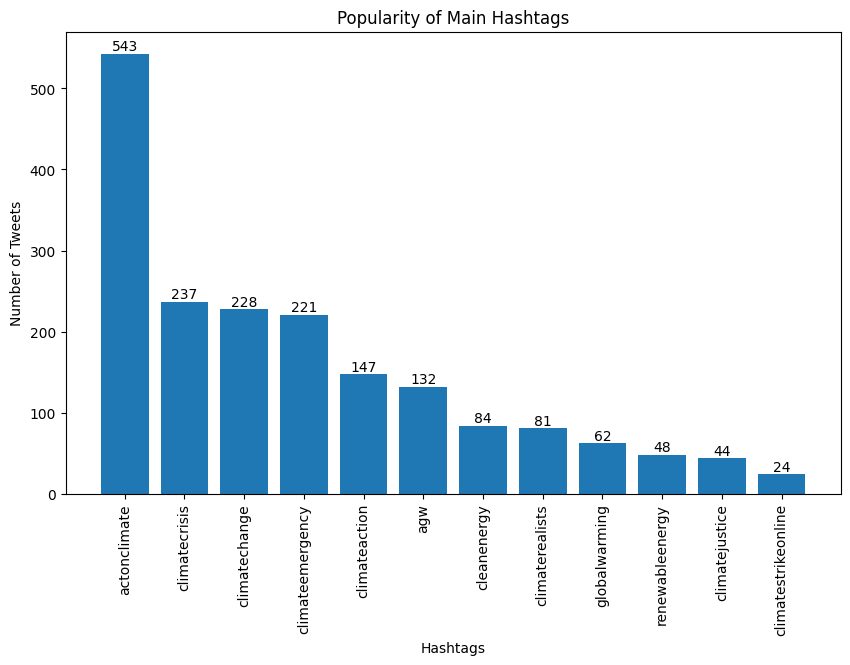

In [6]:
# Extract the hashtags from the DataFrame
count_hashtags = []
for list in Tweet_df['main_hashtag']:
    for hashtag in list:
        count_hashtags.append(hashtag)

# Count the occurrences of each hashtag
count_hashtags = Counter(count_hashtags)

# convert to dictionary
count_hashtags = dict(count_hashtags)

# Sort the hashtags by their counts
count_hashtags = sorted(count_hashtags.items(), key=lambda x: x[1], reverse=True)
hashtags_key = [x[0] for x in count_hashtags]
hashtag_counts = [x[1] for x in count_hashtags]

# plot a histogram of hashtag occurrences
plt.figure(figsize=(10,6))
plt.bar(hashtags_key, hashtag_counts)
plt.xticks(rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Number of Tweets')
plt.title('Popularity of Main Hashtags')

# Add annotations for each bar
for i, count in enumerate(hashtag_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

#### <font color = 'black'>2.3 Draw a graph that visualise the number of distinct Tweet users per individual hashtag </font>

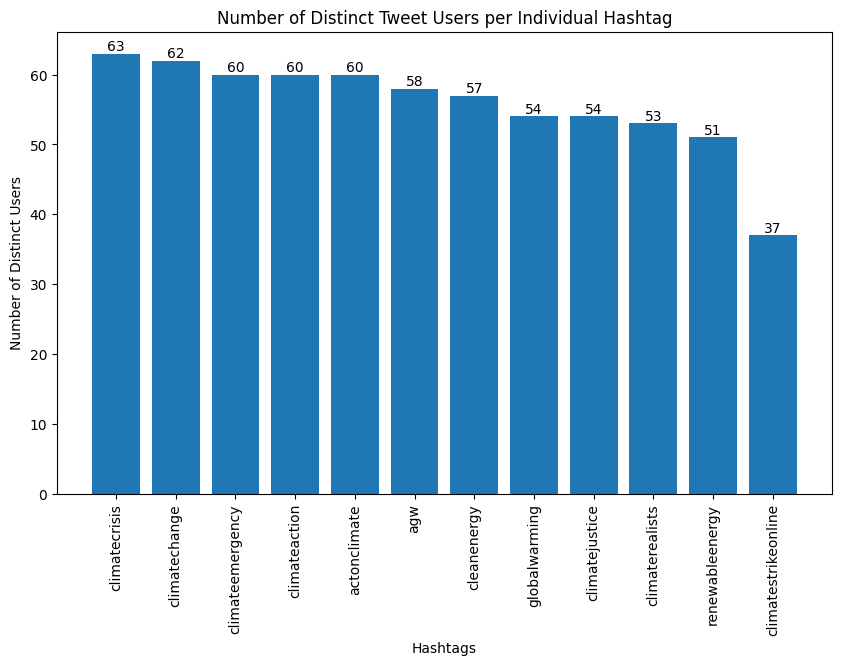

In [7]:
# Extract the hashtags and users from the DataFrame
hashtags = []
users = []
for i, list in enumerate(Tweet_df['main_hashtag']):
    for hashtag in list:
        hashtags.append(hashtag)
        users.append(Tweet_df['user_screen_name'][i])

# Count the number of distinct users for each hashtag
distinct_users_per_hashtag = {}
for i, hashtag in enumerate(hashtags):
    if hashtag not in distinct_users_per_hashtag:
        distinct_users_per_hashtag[hashtag] = set(users[i])
    else:
        distinct_users_per_hashtag[hashtag] |= set(users[i])

# Sort the hashtags by their counts
sorted_hashtags = sorted(distinct_users_per_hashtag.items(), key=lambda x: len(x[1]), reverse=True)
hashtags = [x[0] for x in sorted_hashtags]
users = [len(x[1]) for x in sorted_hashtags]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(hashtags, users)
plt.xticks(rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Number of Distinct Users')
plt.title('Number of Distinct Tweet Users per Individual Hashtag')

# Add annotations for each bar
for i, count in enumerate(users):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

***

### <font color = 'sky blue'> Task 3 - Data Analysis: Tweet Location </font>
<font color = 'black'>Draw pie chart illustrations showing regional location of the tweets associated to each of the above main hashtags using the location attribute of the tweet (whenever available).</font>

In [8]:
# create a dictionary to store the location count for each hashtag
country_count = {}
for hashtag in main_hashtags:
    hashtag_df = Tweet_df[Tweet_df['hashtag'].str.contains(hashtag, na=False)]
    country_count[hashtag] = hashtag_df['location'].value_counts()

C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  plt.tight_layout()
C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  plt.tight_layout()
C:\Users\saara\AppData\Local\Temp\ipykernel_8740\1347258396.py:15: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tigh

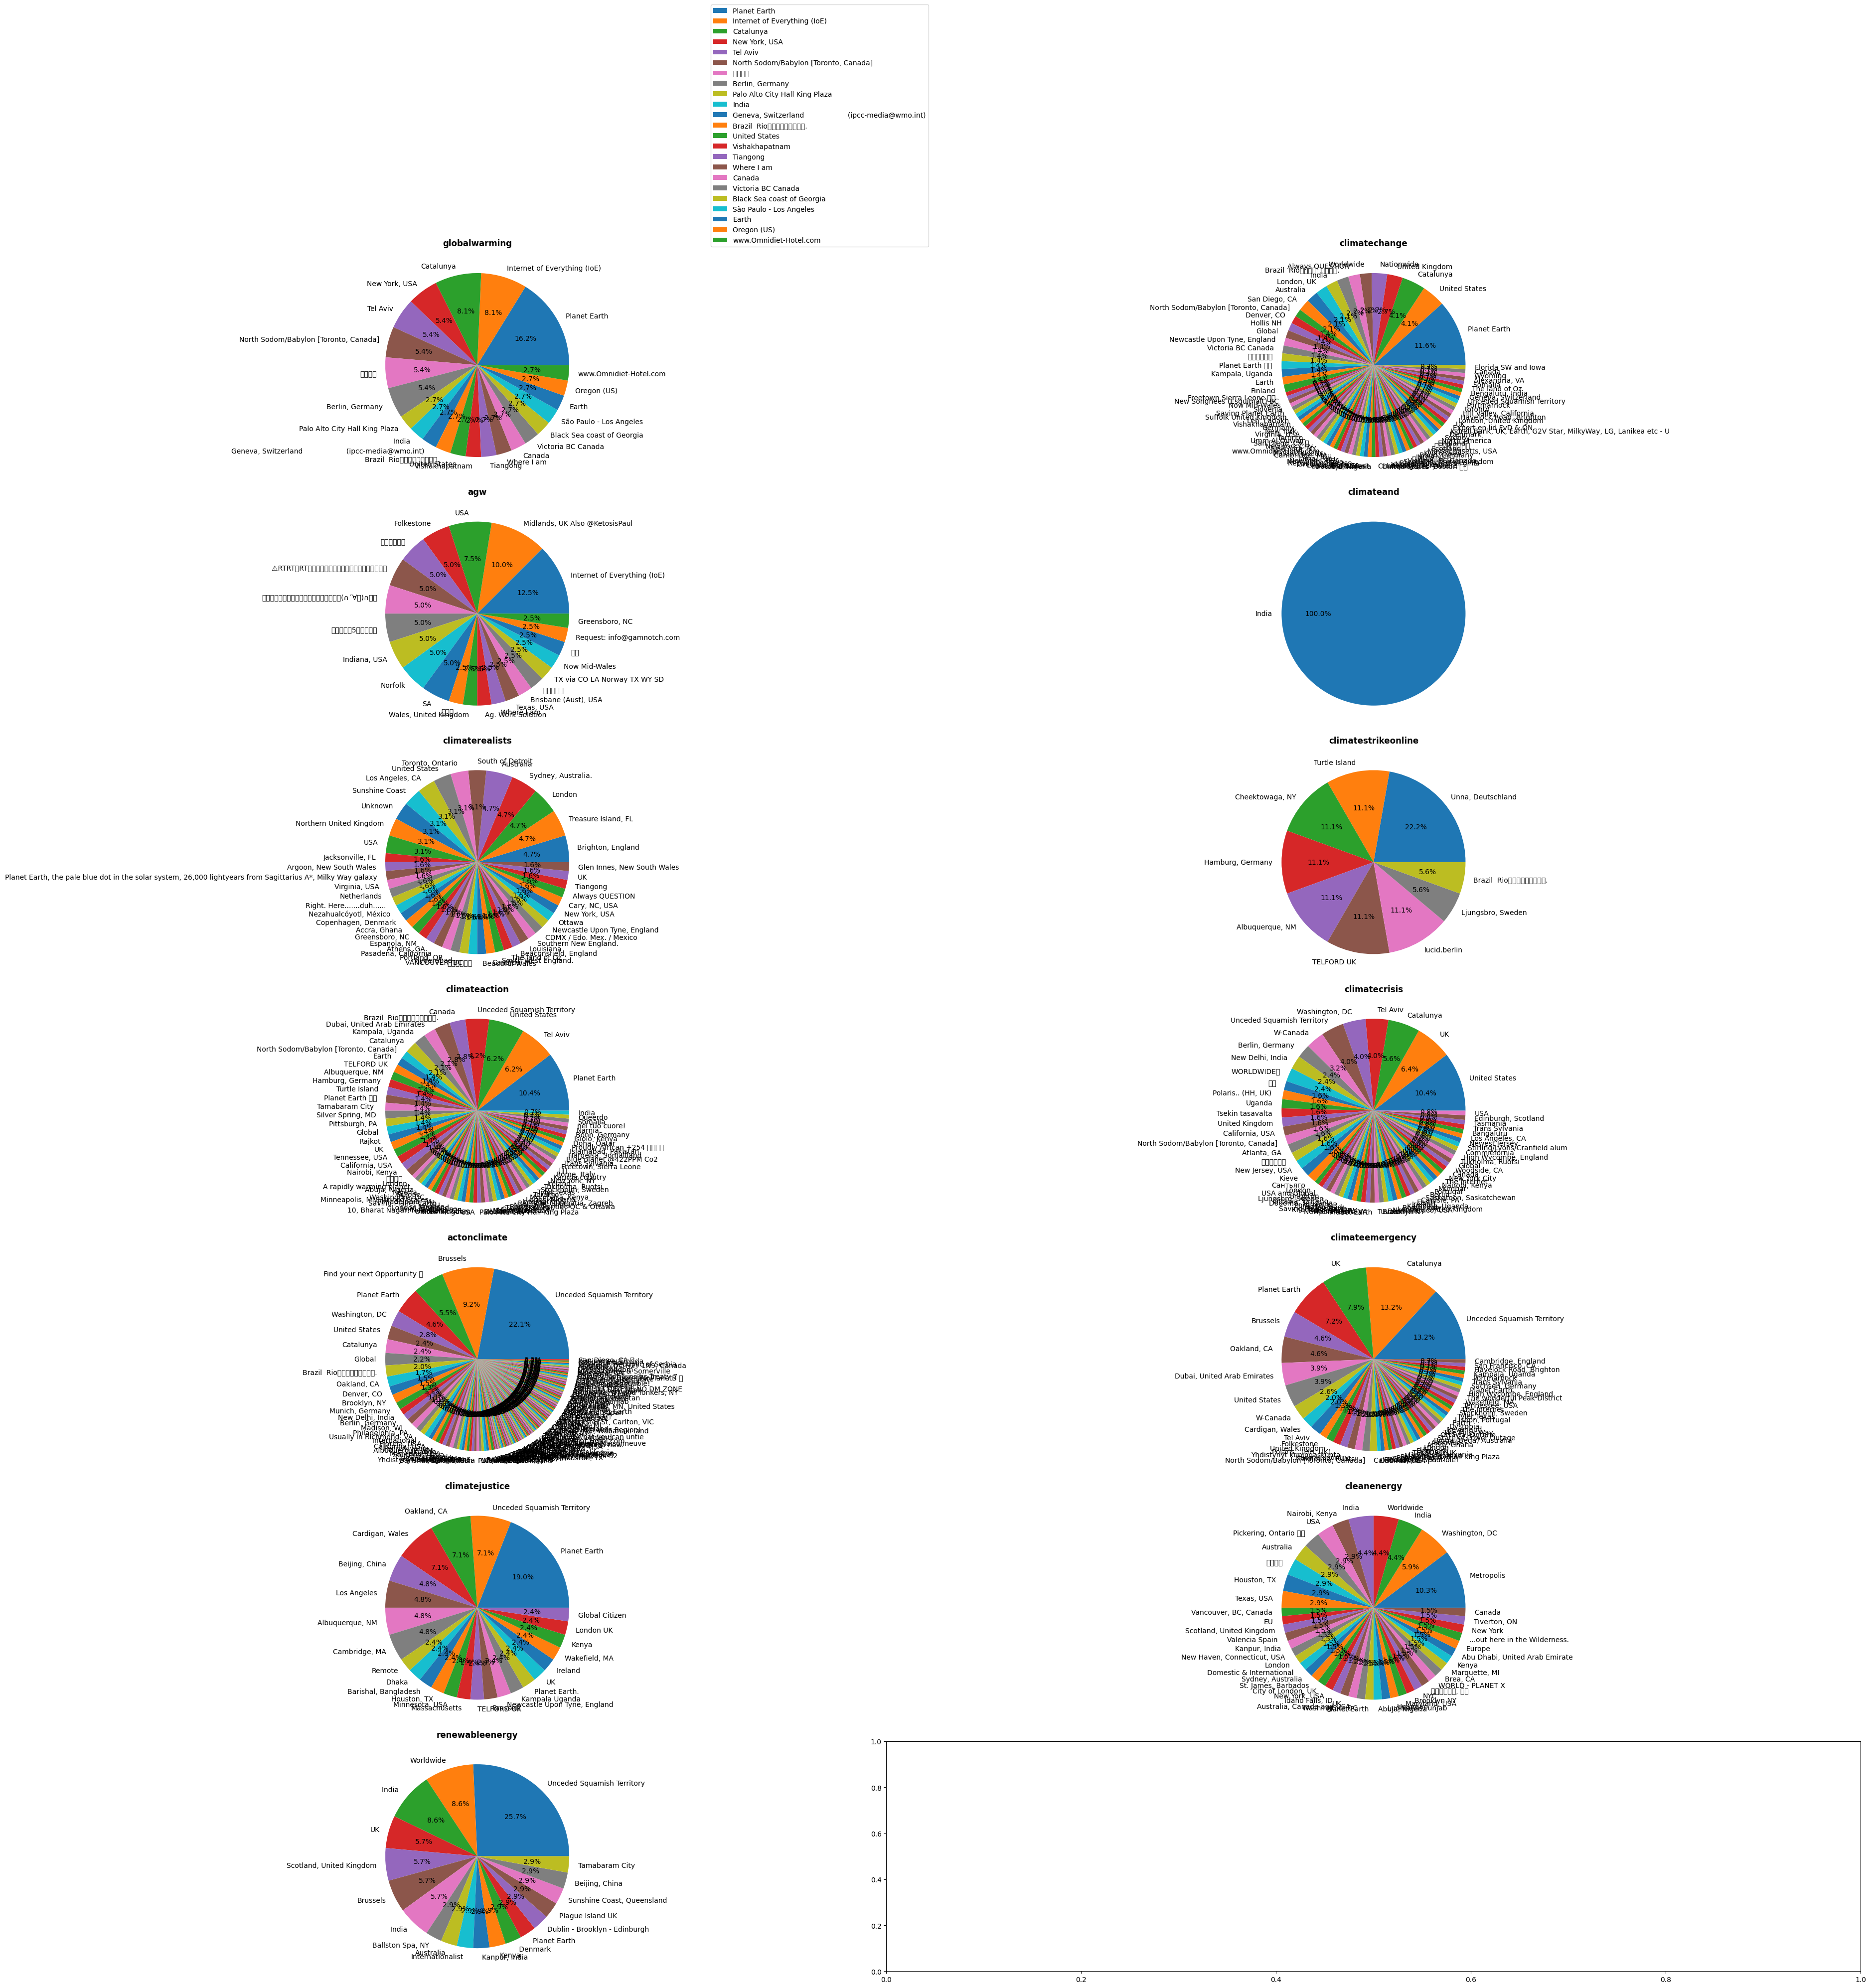

In [9]:
# create pie charts for each hashtag
fig, axs = plt.subplots(7, 2, figsize=(40,40))
axs = axs.flatten()

for i, hashtag in enumerate(main_hashtags):
    ax = axs[i]
    ax.set_title(hashtag, weight='bold')
    country_count[hashtag].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    if i != 0:
        ax.set_ylabel('')
    else:
        ax.legend(loc='lower left', bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()

***

### <font color = 'sky blue'> Task 4 - Data Analysis: Tweet Language </font>
<font color = 'black'>Use other pie chart illustrations to show the language of the tweets for each of the above main hashtags.</font>

In [10]:
# create a dictionary to store the language count for each hashtag
lang_count = {}
for hashtag in main_hashtags:
    hashtag_df = Tweet_df[Tweet_df['hashtag'].str.contains(hashtag, na=False)]
    lang_count[hashtag] = hashtag_df['lang'].value_counts()

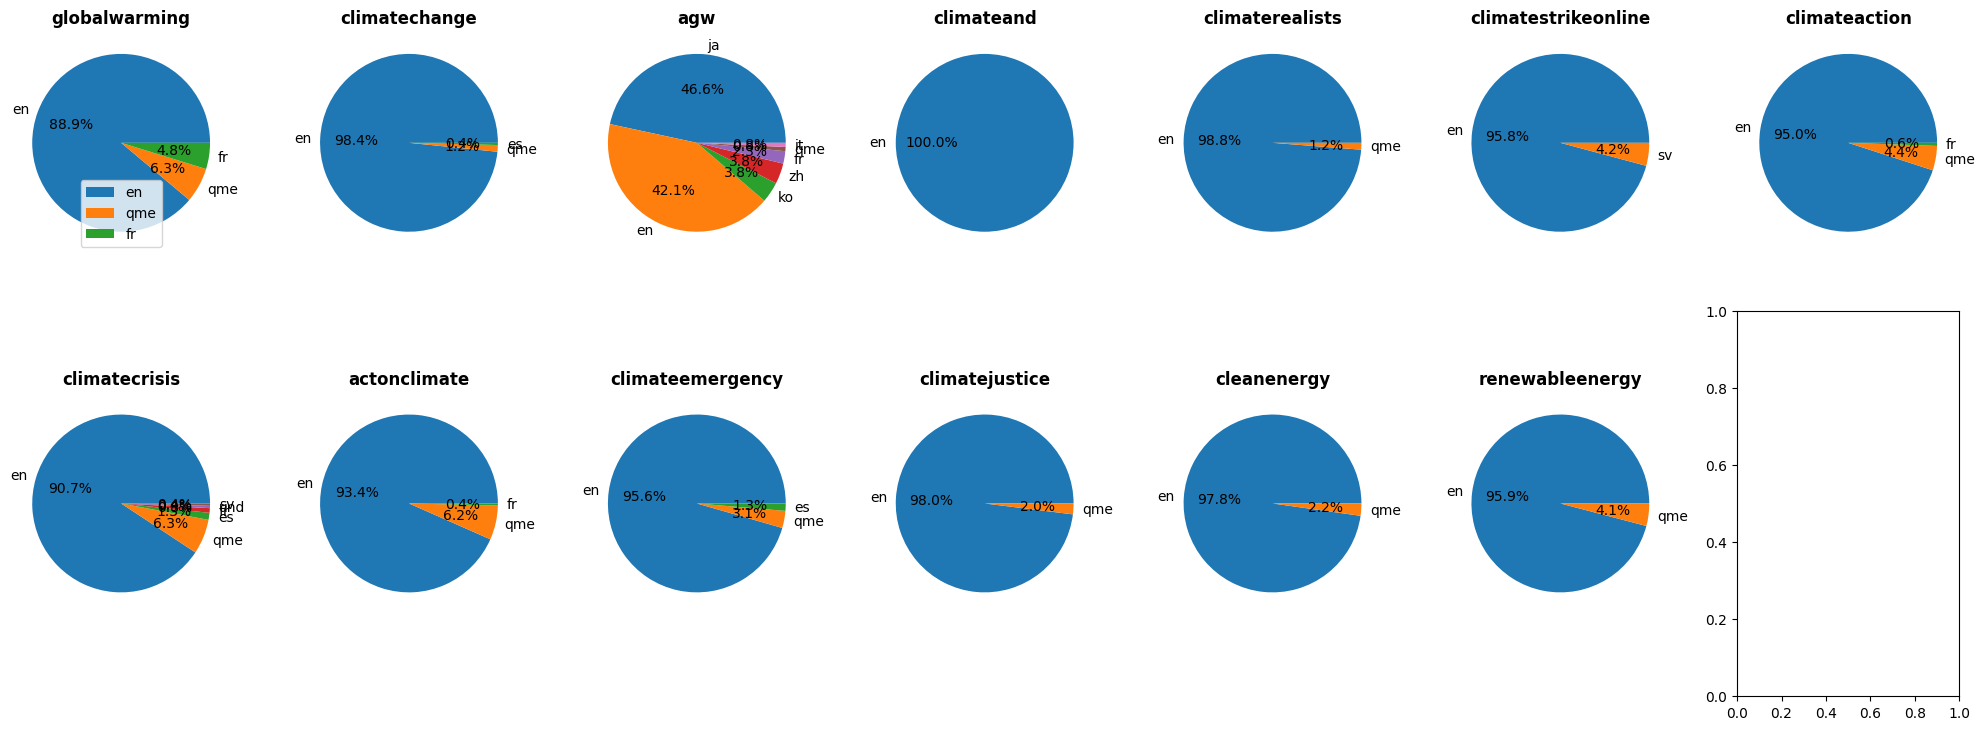

In [11]:
# create pie charts for each hashtag
fig, axs = plt.subplots(2, 7, figsize=(20,8))
axs = axs.flatten()

for i, hashtag in enumerate(main_hashtags):
    ax = axs[i]
    ax.set_title(hashtag, weight='bold')
    lang_count[hashtag].plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    if i != 0:
        ax.set_ylabel('')
    else:
        ax.legend(loc='lower center')

plt.tight_layout()
plt.show()

***

### <font color = 'sky blue'> Task 5 - Sentiment Analysis using VADER Tool </font>
<font color = 'black'>Use VADER tool (https://github.com/cjhutto/vaderSentiment), which output sentiment in terms of POSITIVE, NEGATIVE and NEUTRAL to determine the sentiment of each tweet of the dataset. Then represent the distribution of each tweet as a point in the ternary plot.</font>

In [12]:
# import required library
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# filter the dataframe to only include rows where main_hashtag has a value
# df_contain_main_hashtag = Tweet_df[Tweet_df['main_hashtag'].apply(lambda x: len(x) > 0)]
df_contain_main_hashtag = Tweet_df[Tweet_df['main_hashtag'].str.len() > 0]

# extract the full_text column from the filtered dataframe
Text = df_contain_main_hashtag["full_text"]

def sentiment_scores(Text):
    # initialize sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = []

    # loop through each text and calculate sentiment scores
    for n in Text:
        value = analyzer.polarity_scores(n)
        sentiment_dict.append(value)
    
    return sentiment_dict


# calculate sentiment scores for the Text column
data = sentiment_scores(Text)

# create a dataframe from the sentiment scores
df = pd.DataFrame(data)

# create a scatter ternary plot using the negative, neutral, and positive sentiment scores
fig = px.scatter_ternary(df, a='neg', b='neu', c='pos')

fig.update_layout(
    title={
        'text': "Ternary Distribution plot",
        'y':.97,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# show the plot
fig.show()

***

### <font color = 'sky blue'> Task 6 - Social Graph Generation </font>
<font color = 'black'> Now build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a small python program that allows you to identify hashtags in tweet messages and generate the above social network graph.
</font>

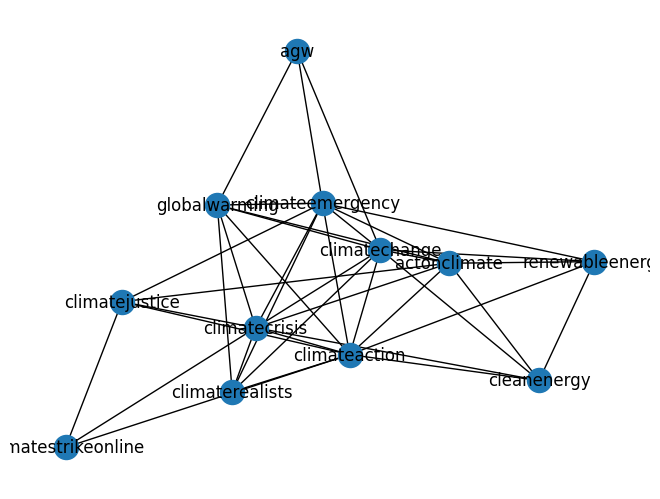

In [17]:
#import required library
import networkx as nx

# create an empty graph
graph = nx.Graph()

# extract the main_hashtag column from the dataframe
hashtags = Tweet_df['main_hashtag']

length = len(hashtags)

# loop through each row in the main_hashtag column
for i in range(length):
    for j in range(1, len(hashtags[i])):
        
        # add an edge between the first hashtag and all other hashtags in the row
        graph.add_edge(hashtags[i][0], hashtags[i][j])

# plot the graph
nx.draw(graph, with_labels=True)

***

### <font color = 'sky blue'> Task 7 - Degree Distribution and Local Clustering Coefficient Distribution </font>
<font color = 'black'> 7.1 Summarize in a table the main global properties of the above graph: Number of nodes, Number of edges, average degree centrality, diameter, clustering coefficient, size of largest component using appropriate NetworkX functions. Comment on the obtained results highlighting any inherent limitation or characteristic of the data collection process.
</font>

In [24]:
# calculate the graph properties
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
avg_degree_centrality = nx.degree_centrality(graph)

# loop to iterate for values
resulted = dict()
for key in avg_degree_centrality:
     
    # rounding to K using round()
    resulted[key] = round(avg_degree_centrality[key], 2)

avg_degree_centrality = str(resulted)

diameter = nx.diameter(graph)
clustering_coefficient = nx.average_clustering(graph)
largest_component_size = len(max(nx.connected_components(graph), key=len))

# create the summary table
table = [
    ["Number of nodes", num_nodes],
    ["Number of edges", num_edges],
    ["Average degree centrality", avg_degree_centrality],
    ["Diameter", diameter],
    ["Clustering coefficient", round(clustering_coefficient,2)],
    ["Size of largest component", largest_component_size]
]

# print the table
print("Graph Summary Table:")
for row in table:
    print("{:<28} {:<10}".format(row[0], row[1]))

Graph Summary Table:
Number of nodes              12        
Number of edges              39        
Average degree centrality    {'climatechange': 0.82, 'agw': 0.27, 'globalwarming': 0.64, 'climateemergency': 0.82, 'climatecrisis': 0.82, 'climateaction': 0.91, 'actonclimate': 0.73, 'renewableenergy': 0.45, 'cleanenergy': 0.45, 'climatejustice': 0.45, 'climaterealists': 0.45, 'climatestrikeonline': 0.27}
Diameter                     3         
Clustering coefficient       0.79      
Size of largest component    12        


<font color = 'black'> 7.2 Plot the degree distribution and local clustering coefficient distribution.</font>

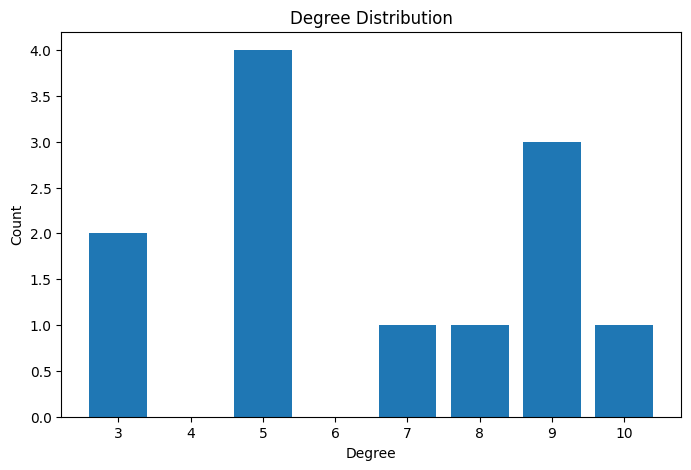

In [19]:
# calculate the degree distribution
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    if degree not in degree_count:
        degree_count[degree] = 0
    degree_count[degree] += 1
degrees, counts = zip(*degree_count.items())

# plot the degree distribution
plt.figure(figsize=(8, 5))
plt.bar(degrees, counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

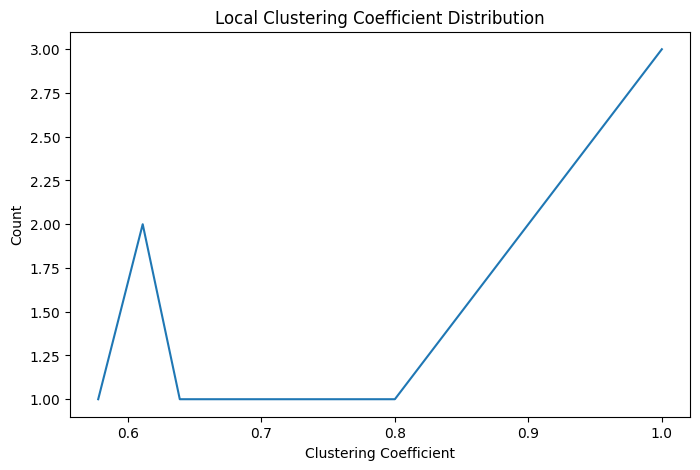

In [20]:
# calculate the local clustering coefficient distribution
clustering_sequence = sorted(nx.clustering(graph).values(), reverse=True)
clustering_count = {}
for clustering in clustering_sequence:
    if clustering not in clustering_count:
        clustering_count[clustering] = 0
    clustering_count[clustering] += 1
clustering_values, clustering_counts = zip(*clustering_count.items())

# plot the local clustering coefficient distribution
plt.figure(figsize=(8, 5))
plt.plot(clustering_values, clustering_counts)
plt.title("Local Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")
plt.show()

***

### <font color = 'sky blue'> Task 8 - Community Detection using Label Propagation Algorithm </font>
<font color = 'black'> Use label propagation algorithm in NetworkX to find communities in the above network. Compare the size of the generated communities and their associated diameter and clustering coefficient in a table. Using your understanding of the name of the hashtag, speculate whether each community can be assigned some interpretation.
</font>

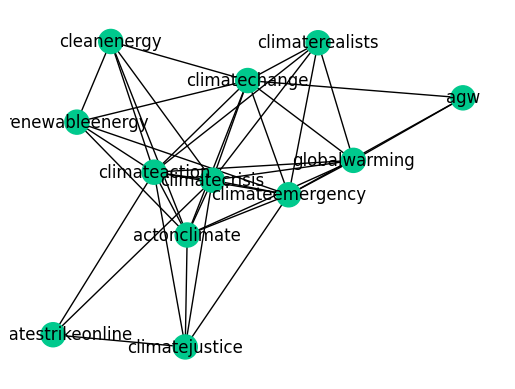

╒════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name                   │ Value                                                                                                                                                                                                                        │
╞════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Communities            │ dict_values([{'climateaction', 'climatejustice', 'actonclimate', 'climaterealists', 'renewableenergy', 'climateemergency', 'cleanenergy', 'climatecrisis', 'climatestrikeonline', 'globalwarming', 'climatechange', 'agw'}]) │


In [25]:
import networkx as nx
from networkx import community
from tabulate import tabulate

#Find the communities
communities = community.label_propagation_communities(graph)


data = [["Communities", communities],
        ["Diameter", diameter],
        ["Clustering coefficient", clustering_coefficient]]

col_names = ["Name", "Value"]

#Create a table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

***

### <font color = 'sky blue'> Task 9 - Bot Detection using Botometer </font>
<font color = 'black'> Now we want to comprehend the key players in the graph whether they are genuine or not. For this purpose, consider the 10 most ranked in terms of degree centrality, and scrutinize the tweets which are linked to those hashtags (10 most ranked). The scrutinizing consists in applying the botometer available in https://github.com/IUNetSci/botometer-python. The program inputs a tweet user id and outputs the probability that the user id is a bot or human. You can use a threshold 0.5 beyond which a program is bot or not. The purpose is therefore to test whether a given user id (Tweet user of the tweet that contains the hashtag) is a bot or not. Draw a relevant plot which shows the proportion of bots in the top ranked hashtag.</font>

***

### <font color = 'sky blue'> Task 10 - Quantification of Support for Hashtags  </font>
<font color = 'black'> We would like to test the amount of support assigned to each hashtag. For this purpose use the information about number of retweets and number of replies of each tweet involved in the hashtag and suggest an expression that quantifies the amount of support.</font>

In [32]:
import pandas as pd
df_tweetdata = pd.read_csv('C:/Users/saara/OneDrive/Tiedostot/yliopisto/SNA_project_twitter_data.csv')
df_tweetdata.head()

,Unnamed: 0,username,like,reply,retweet,time,text,status
0,@AgwSnsJp-2023-04-30T10:00:01.000Z,@AgwSnsJp,220,19,1041,2023-04-30T10:00:01.000Z,Against War\n@AgwSnsJp\n·\n1h\n／\n #AgainstWar...,1652613768508231682
1,@AgwSnsJp-2023-04-27T10:00:00.000Z,@AgwSnsJp,943,131,4809,2023-04-27T10:00:00.000Z,Against War\n@AgwSnsJp\n·\nApr 27\n／\n #Agains...,1651526600939167745
2,@AgwSns-2023-04-30T09:00:01.000Z,@AgwSns,1,0,0,2023-04-30T09:00:01.000Z,Against War\n@AgwSns\n·\n2h\n【Against War Tips...,1652598668816531458
3,@AgwSns-2023-04-29T09:00:01.000Z,@AgwSns,6,0,1,2023-04-29T09:00:01.000Z,Against War\n@AgwSns\n·\nApr 29\n【Against War ...,1652236284285288449
4,@AgwSns-2023-04-26T09:30:00.000Z,@AgwSns,10,0,3,2023-04-26T09:30:00.000Z,Against War\n@AgwSns\n·\nApr 26\nA letter from...,1651156664178061312


In [33]:
Retweets = df_tweetdata.loc[:, "retweet"]
Replies = df_tweetdata.loc[:, "reply"]

sum = Retweets + Replies
print(sum)

0       1060
1       4940
2          0
3          1
4          3
        ... 
4131       0
4132       2
4133       6
4134       4
4135       2
Length: 4136, dtype: int64


***

### <font color = 'sky blue'> Discussion and Conclusion  </font>
<font color = 'black'> Comment the results of the previous steps using some literature from climate change in order to reinforce your argumentation.</font>